# Programación para la Bioinformática

Unidad 4: ADN, ARN, secuencias y motivos (Parte 2)
--------------------------------------------------

## Etiquetas

Bienvenidos a la PEC de la unidad 2. Bajo estas lineas encontrareis Ejercicios y preguntas cada uno de ellos tendrá una etiqueta que indica los recursos necesarios para resolverlos. Hay tres posibles etiquetas:



* **<font color="green" size="+2">MU</font>** **Materiales unidad**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura.

* **<font color="blue" size="+2">EG</font>** **Consulta externa guiada**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de como encontrar la información adicional necesaria.

* **<font color="gold" size="+2">CI</font>** **Consulta externa independiente**: la actividad puede requerir utilizar herramientas que no se encuentran en los materiales de la asignatura, y el enunciado no incluye las indicaciones de como encontrar la información adicional. El estudiante deberá buscar esta información independientemente.)

## Tests

Antes de nada, decir que en el ámbito de la programación es muy común utilizar tests (llamados tests unitarios) durante la codificación de los programas. Los tests sirven para saber si un programa se comporta como se espera. Es decir, sirven para validar la funcionalidad del programa, no para determinar la calidad del código.

Así pues, los tests son un gran aliado del programador. Es por eso que la mayoría de los ejercicios e incluso alguna de las preguntas tendran una celda bajo ellas con un comentario en la primera línea con el título: `# Test Ejercicio X` o `Test Pregunta X`

**IMPORTANTE**: **no debéis modificar las celdas de test**.

Si las ejecutáis, lo que CoLab hará será ejecutar el test correspondiente sobre vuestro código. Dependiendo del resultado, sabréis que:

* Si el test falla, entonces vuestro código no funciona como se espera. Así pues, tendréis que corregirlo.

* Si el test no falla, entonces vuestro código se comporta como se espera. Sin embargo, esto no significa que el el ejercicio sea correcto, ya que hay situaciones en las que se pide usar una determinada función o estructura. Por ejemplo, imaginad que se pide resolver un ejercicio usando un ``for`` y, en su lugar, usáis un ``while``. Pues seguramente vuestro programa pasaría el test (porque funciona como se espera), pero no respeta un requisito del enunciado.

**Para poder ejecutar los tests primero debéis ejecutar la siguiente celda de código**: (Tan solo una vez por sesión)


In [3]:
!pip install ipytest
import ipytest
ipytest.autoconfig()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


### Instrucciones de uso
A continuación se presentará la teoría y algún ejemplo de algoritmo genético. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Algoritmos inspirados en la naturaleza
Existe una categoría de algoritmos que utilizan conceptos basados o inspirados en la naturaleza estableciendo una metáfora que los hace más comprensibles para los humanos. Muy populares en algoritmos de inteligencia artificial, empezaron a aparecer en la década de los 70 del siglo pasado y en la última década han explotado hasta convertirse en métodos casi estándares.

Una familia de algoritmos de inteligencia artificial inspirados en la naturaleza muy populares son los **algoritmos genéticos**. Los algoritmos genéticos utilizan conceptos de la genética, como son las mutaciones, los mecanismos de selección o los cruces. Los algoritmos genéticos se utilizan con el objetivo de optimizar valores de una función cualquiera en su espacio de valores. El funcionamiento básico del algoritmo está descrito en la siguiente figura (fuente Wikipedia - https://es.wikipedia.org/wiki/Algoritmo_gen%C3%A9tico):

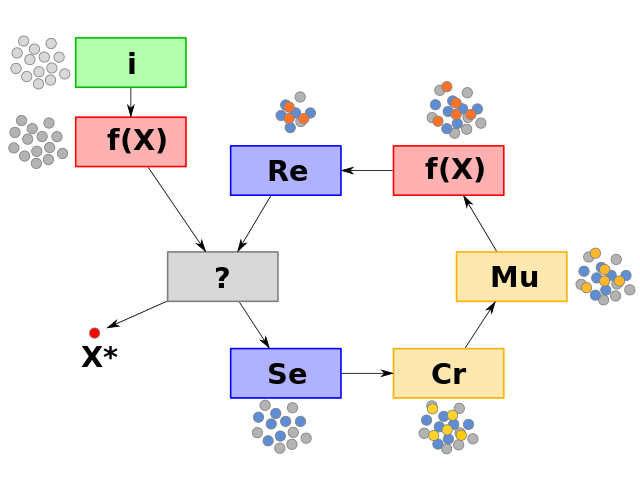

* **Inicialización** (I). Se genera aleatoriamente una población inicial, constituida por un conjunto de cromosomas (o también llamados genes) que representan posibles soluciones del problema. Esta población deberá tener una diversidad inicial lo suficientemente rica para garantizar que el algoritmo no converja de forma prematura en soluciones no óptimas.
* **Evaluación** (?). Para cada uno de los cromosomas, lo evaluaremos en el espacio de búsqueda (aplicaremos la función que deseamos optimizar) y después calcularemos la distancia a la solución que queremos obtener. Esta solución objetivo es muy importante y está codificada en la función de *fitness* que dirigirá la evolución hacia esa solución óptima (podemos conocerla o no, en este segundo caso, la expresaremos en forma de función: cuán rápido es un coche, cuál es la cantidad monetaria más grande, etc.). Deberemos, además, definir las condiciones de parada del algoritmo para no entrar en bucle infinito: o bien acotando el número de pasos del algoritmo o bien cuando en la población ya no haya cambios.
* **Selección** (Se). Si no se ha dado la condición de parada, se procede a elegir los cromosomas que serán cruzados en la siguiente generación, para ello, seleccionaremos los mejores cromosomas ordenándolos por su aptitud.
* **Cruce** (Cr). Representa en esta metáfora la reproducción sexual y opera sobre dos cromosomas a la vez para generar dos descendientes donde se combinan las características de ambos cromosomas padres.
* **Mutación** (Mu). Modifica de forma aleatoria parte del cromosoma de los individuos de la población para añadir diversidad y poder salir de pozos locales en el espacio de búsqueda.
* **Reemplazo** (Re). Una vez aplicados los operadores genéticos, se seleccionan los mejores individuos para conformar la población de la generación siguiente y continuar con otro paso de la simulación.

### Ejercicio 1 **<font color="gold" size="+2">CI</font>**
El siguiente código es una implementación de un algoritmo genético que optimiza la búsqueda de un string, es decir, dado un string **objetivo**, intenta encontrar esa cadena empezando desde diversas cadenas con caracteres aleatorios.

In [ ]:
import random
import string

objetivo = "bioinformatics_programming"

GENES = 50
MAX_GENERACION = 20000

# Clase para crear objetos Individuo con adn y fitness
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness


# Función que compara el adn con el valor objetivo
def calcular_fitness(origen, valor_objetivo):

    # Igualamos variable fitness a 0
    fitness = 0

    # Del 0 a la longitud del adn proporcionado
    for i in range(0, len(origen)):

        # Calculamos diferencia entre los valores unicodes de las letras elevado al cuadrado
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2

    # Devolvemos resultado de fitness
    return fitness


# Función que aplica mutaciones a partir de las secuencias de los padres y crea
# un objeto Individuo
def mutacion(padre1, padre2):

    # Guardamos en la variable adn_hijo el adn del primer padre
    adn_hijo = padre1.adn[:]

    # Definimos start y stop eligiendo un número aleatorio entre 0 y el tamaño del adn del segundo padre
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)

    # En caso de que el inicio sea mayor que el final, invertimos el orden
    if start > stop:
        stop, start = start, stop

    # Intercambiamos adn del hijo para el rango definido por el del padre2
    adn_hijo[start:stop] = padre2.adn[start:stop]

    # Elegimos posición aleatoria entre 0 y tamaño del adn del hijo
    posicion = random.randint(0, len(adn_hijo) - 1)

    # Convertimos la letra en dicha posición a unicode y aleatoriamente sumamos o restamos 1
    # Convertimos número a carácter unicode
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))

    # Calculamos fitness del hijo con respecto al objetivo
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)

    # Devolvemos objeto Individuo con adn y fitness del hijo tras aplicar mutaciones
    return Individuo(adn_hijo, fitness_hijo)


# Escoge un padre al azar de la población multiplicando el número de genes por 2 veces
# un número aleatorio entre el 0.0 y 1.0
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


# Función que muestra por pantalla los resultados de la generación
def escribe_generacion(generacion, poblacion):

    # Imprimimos el número de generación
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')

    # Para cada individuo en la población
    for candidato in poblacion:

        # Imprimimos por pantalla el fitness y el adn del individuo
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


# Función que crea poblaciones
def inicializa_poblacion():

    # Creamos variable con lista vacía donde guardar individuos
    poblacion = []

    # Del 0 al número de genes
    for i in range(0, GENES):

        # Creamos lista con longitud del objetivo eligiendo aleatoriamente caracteres de la "string"
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]

        # Calculamos fitness del adn resultante con respecto al objetivo
        fitness = calcular_fitness(adn, objetivo)

        # Creamos un objeto Individuo y asignamos adn y fitness calculados
        candidate = Individuo(adn, fitness)

        # Incorporamos individuo a la población
        poblacion.append(candidate)

    # Devolvemos lista de individuos en la población
    return poblacion


# Función que simula la generación de poblaciones hasta que sea alcanza el máximo
# fitness o máxima generación
def simulacion():

    # Creamos una población y la guardamos en la variable
    poblacion = inicializa_poblacion()

    generacion = 0

    # Mientras que la generación sea menor que la generación máxima (20000)
    while True and generacion < MAX_GENERACION:

        # Sumamos 1 a la generación
        generacion += 1

        # Ordenamos población de acuerdo al fitness
        poblacion.sort(key=lambda candidate: candidate.fitness)

        # Si el fitness del primer individuo de la población es 0, salimos del bucle
        if poblacion[0].fitness == 0:
            break

        # Escogemos dos padres al azar de la población
        padre1 = padre_al_azar(poblacion)
        padre2 = padre_al_azar(poblacion)

        # Aplicamos función mutación para generar adn y fitness del hijo
        hijo = mutacion(padre1, padre2)

        # Si el fitness del hijo es menor al fitness del individuo con mayor fitness de la población
        if hijo.fitness < poblacion[-1].fitness:

            # Reemplazamos individuo por el hijo
            poblacion[-1] = hijo

    # Cuando se alcanza la máxima generación, imprimimos por pantalla el mensaje
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')

    # Mostramos la población resultante
    escribe_generacion(generacion, poblacion)

# Realizamos la simulación
simulacion()

Pasos de simulación: 7707

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioinformatics_pqogramming
     1 bioinformatics_pqogramming
     1 bioinformatics_pqogramming
     1 bioinformatics_pqogramming
     1 bioinformatics_pqogramming
     2 bioinformatics_pqogramminf
     2 bioinformatics_pqogrammjng
     2 bioinfprmatics_pqogramming
     2 bioinfosmatics_pqogramming
     2 bioimformatics_programminf
     2 bioinforlatics_pqogramming
     2 bioimformatics_pqogramming
     2 bioinformaticr_pqogramming
     2 bioinformatics_pqogrammiog
     2 bioimformatics_pqogramming
     3 bioimforlatics_pqogramming
     3 bioimformatics_pqogramminf
     3 bioimgormatics_pqogramming
     3 bioimforlatics_programmimg
     3 bioimformatics_pqogramminf
     3 bioimgormatics_pqogramming
     3 bioimforlatics_pqogramming
     3 bioinformatics_pqogranmhng
     3 bioimformatics_pqogrammhng
     3 bioimformatics_pqogramminf
     3 bioimforlatics_pqogramming
     3 b

Es muy importante, tanto en bioinformática como en programación en general, leer e interpretar código de otros programadores. Por ello, **en este ejercicio se os pide que comentéis el código anterior con comentarios en el propio código que expliquen las partes más importantes de este**.

### Ejercicio 2 **<font color="green" size="+2">MU</font>**

Escribe una función de fitness alternativa a la función `calcular_fitness` del ejercicio 1. Una función alternativa se refiere a un cáclulo diferente del fitness. Un fitness=0 indica que la cadena objetivo se ha conseguido, es decir que vuestra solución debe cumplir ésta misma norma. Explica en qué consiste tu función de fitness. Para realizar este ejercicio, podéis copiar todo el código del ejercicio anterior y hacer las modificaciones pertinentes sobre la función `calcular_fitness()`.

In [4]:
# Respuesta

import random
import string

# Función que calcula fitness incrementando penalización conforme al número de cambios
def calcular_fitness_alternativa(origen, valor_objetivo):

    # Definimos variables donde guardar fitness y número de cambios
    fitness = 0
    cambio = 0

    try:
        # Del 0 a la longitud del adn proporcionado
        for i in range(0, len(origen)):

            # Si la letra en dicha posición es distinta a la del objetivo
            if origen[i] != valor_objetivo[i]:

                # Sumamos 1 al cambio (incrementamos penalización)
                cambio += 1

                # Calculamos fitness elevando el cambio al cuadrado
                fitness += cambio ** 2

    # En caso de IndexError, imprimimos mensaje por pantalla
    except IndexError:
        return "Las secuencias no tienen la misma longitud"

    # Devolvemos resultado de fitness
    return fitness

Testea que tu código es correcto con el siguiente test unitario


In [5]:
%%ipytest
# Test Ejercicio 2
def test_fitness():
  assert calcular_fitness_alternativa("bioinformatics_programming", "bioinformatics_programming") == 0
  assert calcular_fitness_alternativa("bioinpormatics_porgrammang", "bioinformatics_programming") > 0
  assert calcular_fitness_alternativa("bbbbbbbbbbbbbb_ppppppppppp", "bioinformatics_programming") > calcular_fitness_alternativa("bioinpormatics_porgrammang", "bioinformatics_programming")

.                                                                                            [100%]
1 passed in 0.01s


### Ejercicio 3 **<font color="green" size="+2">MU</font>**

Representa utilizando matplotlib el máximo fitness, el mínimo y la media por paso de la simulación en un gráfico. Copiad y pegad el código del ejercicio 1 y haced las modificaciones pertinentes para que los datos que necesitáis representar se guarden a cada paso de la simulación.

Teneis que usar la funcion de fitness del ejercicio1 , no la que habeis definido en el ejercicio2.

El resultado debe ser similar al siguiente gráfico.



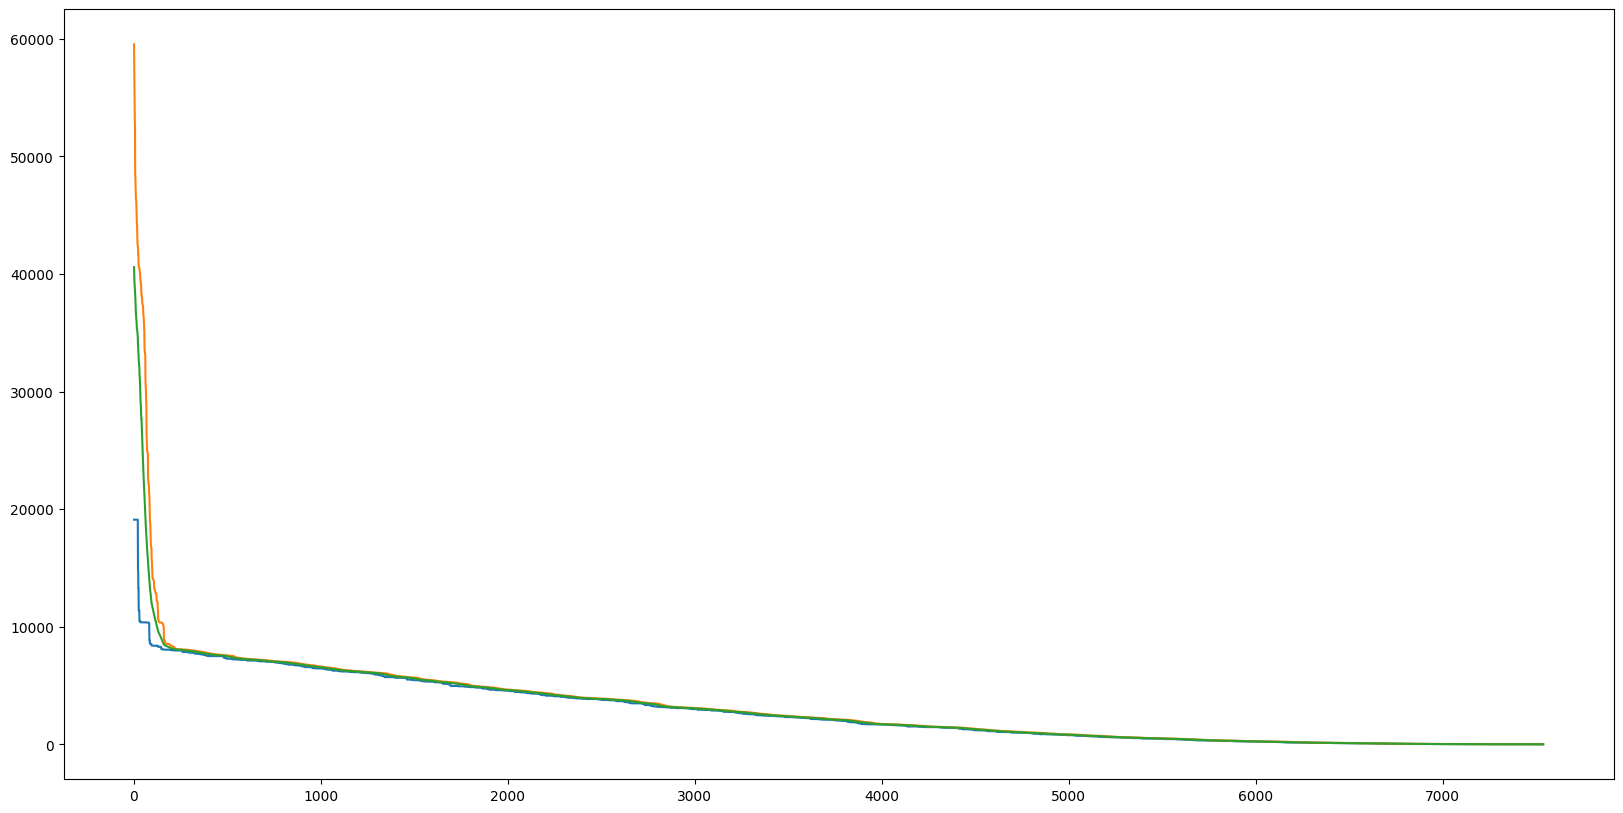

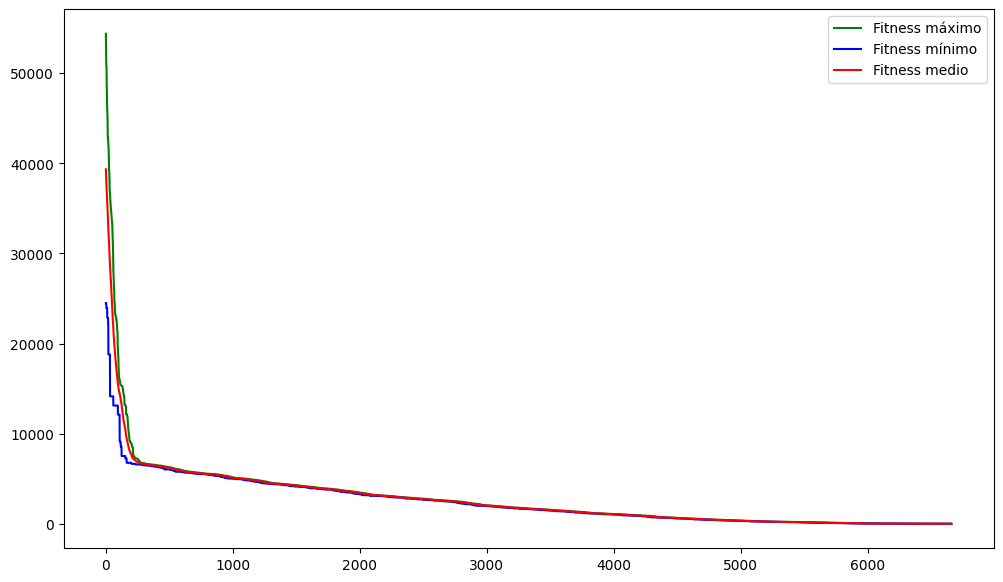

In [22]:
%matplotlib inline

# Respuesta

import random
import string
import statistics
import numpy as np
import matplotlib.pyplot as plt

objetivo = "bioinformatics_programming"

GENES = 50
MAX_GENERACION = 20000

# Clase para crear objetos Individuo con adn y fitness
class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness


# Función que compara el adn con el valor objetivo
def calcular_fitness(origen, valor_objetivo):

    # Igualamos variable fitness a 0
    fitness = 0

    # Del 0 a la longitud del adn proporcionado
    for i in range(0, len(origen)):

        # Calculamos diferencia entre los valores unicodes de las letras elevado al cuadrado
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2

    # Devolvemos resultado de fitness
    return fitness


# Función que aplica mutaciones a partir de las secuencias de los padres y crea
# un objeto Individuo
def mutacion(padre1, padre2):

    # Guardamos en la variable adn_hijo el adn del primer padre
    adn_hijo = padre1.adn[:]

    # Definimos start y stop eligiendo un número aleatorio entre 0 y el tamaño del adn del segundo padre
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)

    # En caso de que el inicio sea mayor que el final, invertimos el orden
    if start > stop:
        stop, start = start, stop

    # Intercambiamos adn del hijo para el rango definido por el del padre2
    adn_hijo[start:stop] = padre2.adn[start:stop]

    # Elegimos posición aleatoria entre 0 y tamaño del adn del hijo
    posicion = random.randint(0, len(adn_hijo) - 1)

    # Convertimos la letra en dicha posición a unicode y aleatoriamente sumamos o restamos 1
    # Convertimos número a carácter unicode
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))

    # Calculamos fitness del hijo con respecto al objetivo
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)

    # Devolvemos objeto Individuo con adn y fitness del hijo tras aplicar mutaciones
    return Individuo(adn_hijo, fitness_hijo)


# Escoge un padre al azar de la población multiplicando el número de genes por 2 veces
# un número aleatorio entre el 0.0 y 1.0
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


# Función que muestra por pantalla los resultados de la generación
def escribe_generacion(generacion, poblacion):

    # Imprimimos el número de generación
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')

    # Para cada individuo en la población
    for candidato in poblacion:

        # Imprimimos por pantalla el fitness y el adn del individuo
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


# Función que crea poblaciones
def inicializa_poblacion():

    # Creamos variable con lista vacía donde guardar individuos
    poblacion = []

    # Del 0 al número de genes
    for i in range(0, GENES):

        # Creamos lista con longitud del objetivo eligiendo aleatoriamente caracteres de la "string"
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]

        # Calculamos fitness del adn resultante con respecto al objetivo
        fitness = calcular_fitness(adn, objetivo)

        # Creamos un objeto Individuo y asignamos adn y fitness calculados
        candidate = Individuo(adn, fitness)

        # Incorporamos individuo a la población
        poblacion.append(candidate)

    # Devolvemos lista de individuos en la población
    return poblacion


# Función que simula la generación de poblaciones hasta que sea alcanza el máximo
# fitness o máxima generación
def simulacion():

    # Creamos una población y la guardamos en la variable
    poblacion = inicializa_poblacion()

    # Definimos variables donde sumar generación y fitness
    generacion = 0
    pobl_fitness = 0

    # Definimos variables con listas donde almacenar valores máximo, mínimo y promedio por generación
    max_fitness = []
    min_fitness = []
    med_fitness = []

    # Mientras que la generación sea menor que la generación máxima (20000)
    while True and generacion < MAX_GENERACION:

        # Sumamos 1 a la generación
        generacion += 1

        # Ordenamos población de acuerdo al fitness
        poblacion.sort(key=lambda candidate: candidate.fitness)

        # Si el fitness del primer individuo de la población es 0, salimos del bucle
        if poblacion[0].fitness == 0:
            break

        # Escogemos dos padres al azar de la población
        padre1 = padre_al_azar(poblacion)
        padre2 = padre_al_azar(poblacion)

        # Aplicamos función mutación para generar adn y fitness del hijo
        hijo = mutacion(padre1, padre2)

        # Si el fitness del hijo es menor al fitness del individuo con mayor fitness de la población
        if hijo.fitness < poblacion[-1].fitness:

            # Reemplazamos individuo por el hijo
            poblacion[-1] = hijo

        # Ordenamos de nuevo la población de acuerdo al fitness
        poblacion.sort(key=lambda individuo: individuo.fitness)

        # Incorporamos valor de fitness máximo y mínimo a las listas
        max_fitness.append(poblacion[-1].fitness)
        min_fitness.append(poblacion[0].fitness)

        # Por cada individuo de la población, extraemos fitness y sumamos a la variable
        for candidate in poblacion:
            pobl_fitness += candidate.fitness

        # Calculamos media dividiendo por número de genes e incorporamos a la lista
        med_fitness.append(pobl_fitness / GENES)

        # Restituimos valor del fitness
        pobl_fitness = 0

    # Cuando se alcanza la máxima generación, imprimimos por pantalla el mensaje
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')

    # Devolvemos valores máximo, mínimo y media por generación
    return max_fitness, min_fitness, med_fitness, generacion

# Extraemos los valores de la simulación en variables
max_fitness, min_fitness, med_fitness, generacion = simulacion()

# Creamos un vector con el número de generaciones
x = np.arange(0, generacion - 1, 1)

# Representamos los valores de las variables

fig = plt.figure(figsize=(12, 7))

plt.plot(x, max_fitness, "-g", label = "Fitness máximo")
plt.plot(x, min_fitness, "-b", label = "Fitness mínimo")
plt.plot(x, med_fitness, "-r", label = "Fitness medio")

# Colocamos la leyenda en la parte superior izquierda
plt.legend(loc="upper right")

# Mostramos la gráfica
plt.show()


**Autoria**

Autores/as que han participado colectivamente en esta obra:


*   Gabriel Felipe Rodríguez Lozano
*   Pau Andrio Balado
*   Brian Jiménez García
*   Melchor Sanchez Martinez

**Fecha de creación**


*   Ultima modificación: Mayo 2024